<a href="https://colab.research.google.com/github/jelkinsjames/17D_code_examples/blob/main/Lab5_Report_CJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 5 Report

## Group Members: Julian James, Anita Chege

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
#import dynworm as dw

In [ ]:
from IPython.display import Image as ipyimage #For displaying images in colab jupyter cell

## Exercise 1: Visualize brain connectomes

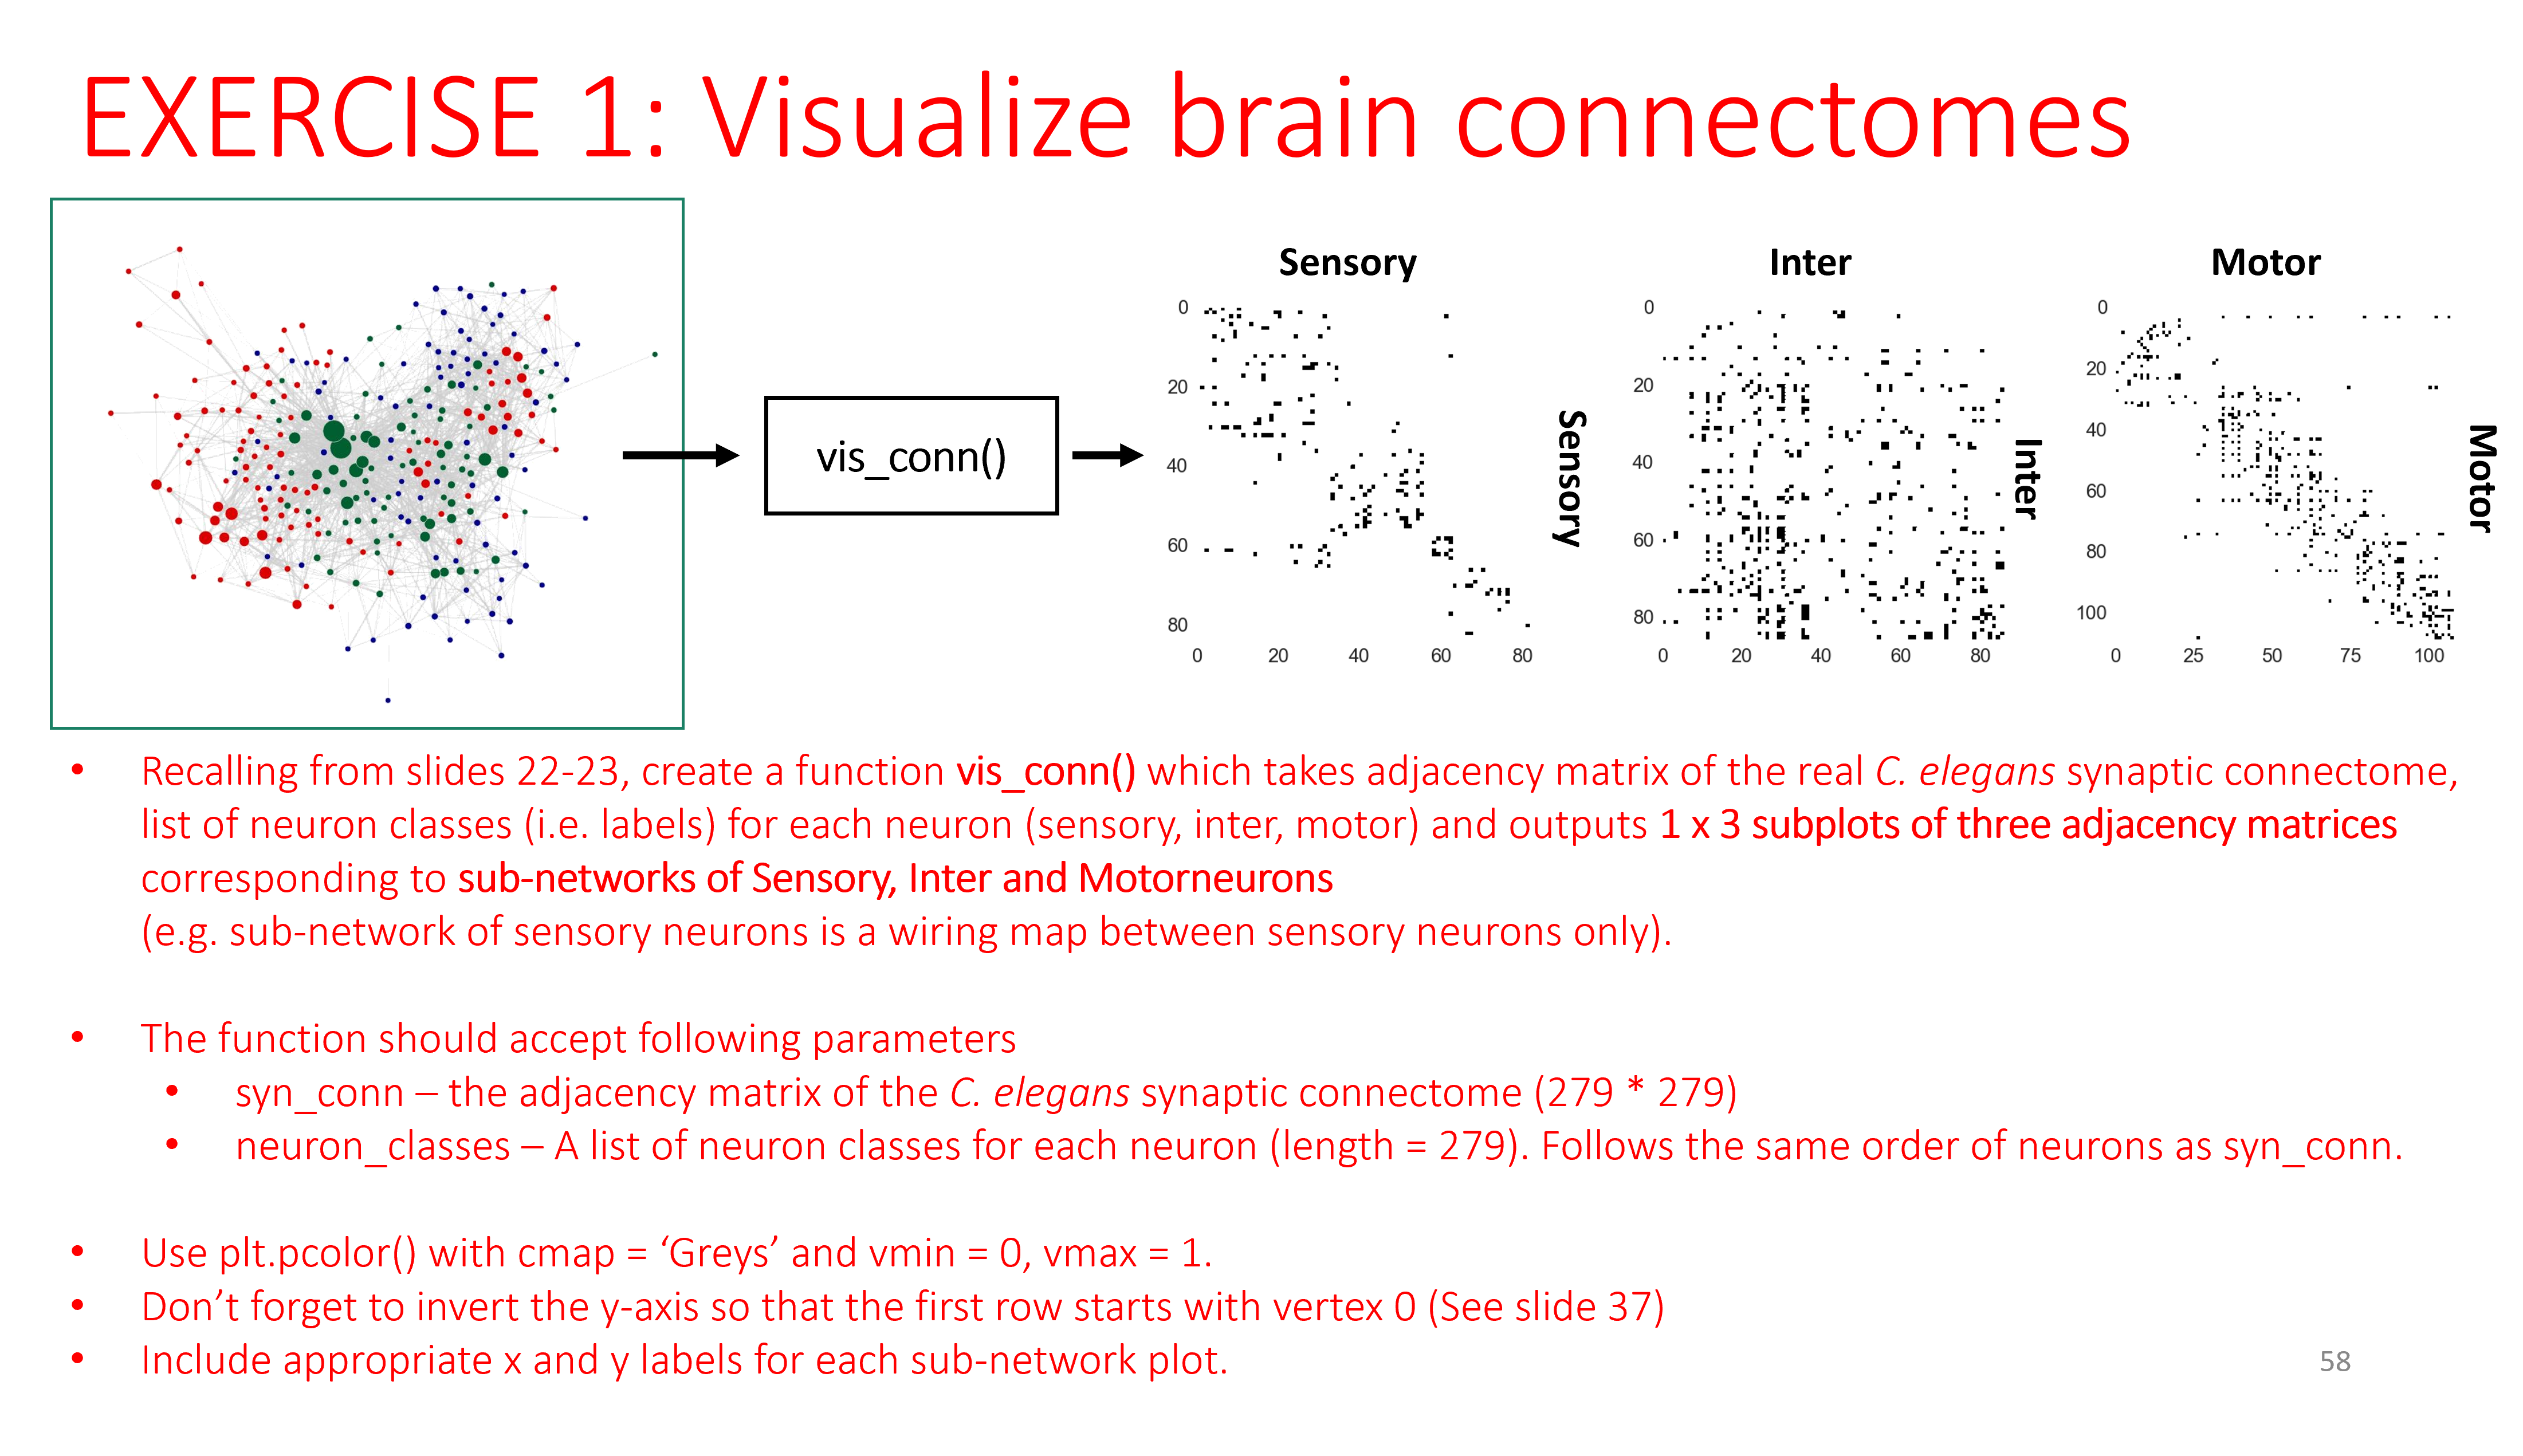

In [ ]:
ipyimage('lab5_exercise1.PNG', width = 1000=\][]

In [ ]:
# Load synaptic connectome and neuron classes

celegans_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
celegans_syn_conn_np = np.array(celegans_syn_conn_pd)

# Classes are ordered according to the neurons' order in synaptic connectome
neuron_classes = np.load('neuron_classes.npy') 

FileNotFoundError: ignored

In [ ]:
# Adjacency matrix of the first 10 neurons
print(celegans_syn_conn_np[:10, :10])

In [ ]:
# Neuron classes of the first 10 neurons
print(neuron_classes[:10]) 

In [ ]:
#Visualizes all the connections between neurons in a given adj matrix brain.
# param syn_conn - the given brain represented as an adj matrix.
# param neuron_classes - the list of classes of each neuron.
def vis_conn(syn_conn, neuron_classes):
              
    sensory_ind = neuron_classes == 'sensory' #Preparing boolean masks that tell us which neurons are which class.
    inter_ind = neuron_classes == 'inter'
    motor_ind = neuron_classes == 'motor'
    sensory_matrix = syn_conn[sensory_ind] #Gets all of the sources that are sensory nerves.
    sensory_matrix = sensory_matrix[:, sensory_ind] #Gets all of the targets that are sensory nerves.
    inter_matrix = syn_conn[inter_ind] #Continues as above.
    inter_matrix = inter_matrix[:, inter_ind]
    motor_matrix = syn_conn[motor_ind]
    motor_matrix = motor_matrix[:, motor_ind]
    
    fig, axes = plt.subplots(1, 3, figsize=(15,5)) #Setups figure and subplots for our plots.
    
    #sensory
    axes[0].pcolor(sensory_matrix, cmap = 'Greys', vmin = 0, vmax = 1)  # Uses plt.pcolor to visualize the adjacency matrix
    axes[0].invert_yaxis()    # Inverts y-axis so that the first row starts with vertex 0
    axes[0].set_ylim(len(sensory_matrix), 0)                               
    axes[0].set_xlabel('Sensory', fontsize=20)                       # Sets appropriate x-label
    axes[0].set_ylabel('Sensory', fontsize=20)                       # Sets appropriate y-label
        
    #inter
    axes[1].pcolor(inter_matrix, cmap = 'Greys', vmin = 0, vmax = 1) 
    axes[1].invert_yaxis()
    axes[1].set_ylim(len(inter_matrix), 0)                               
    axes[1].set_xlabel('Inter', fontsize=20)                     
    axes[1].set_ylabel('Inter', fontsize=20)                                                           
        
    #motor
    axes[2].pcolor(motor_matrix, cmap = 'Greys', vmin = 0, vmax = 1) 
    axes[2].invert_yaxis()
    axes[2].set_ylim(len(motor_matrix), 0)                              
    axes[2].set_xlabel('Motor', fontsize=20)                      
    axes[2].set_ylabel('Motor', fontsize=20)  
     

In [ ]:
# Test your function here

vis_conn(syn_conn = celegans_syn_conn_np, neuron_classes = neuron_classes)

NameError: ignored

## Exercise 2: Locating the most connected vertices

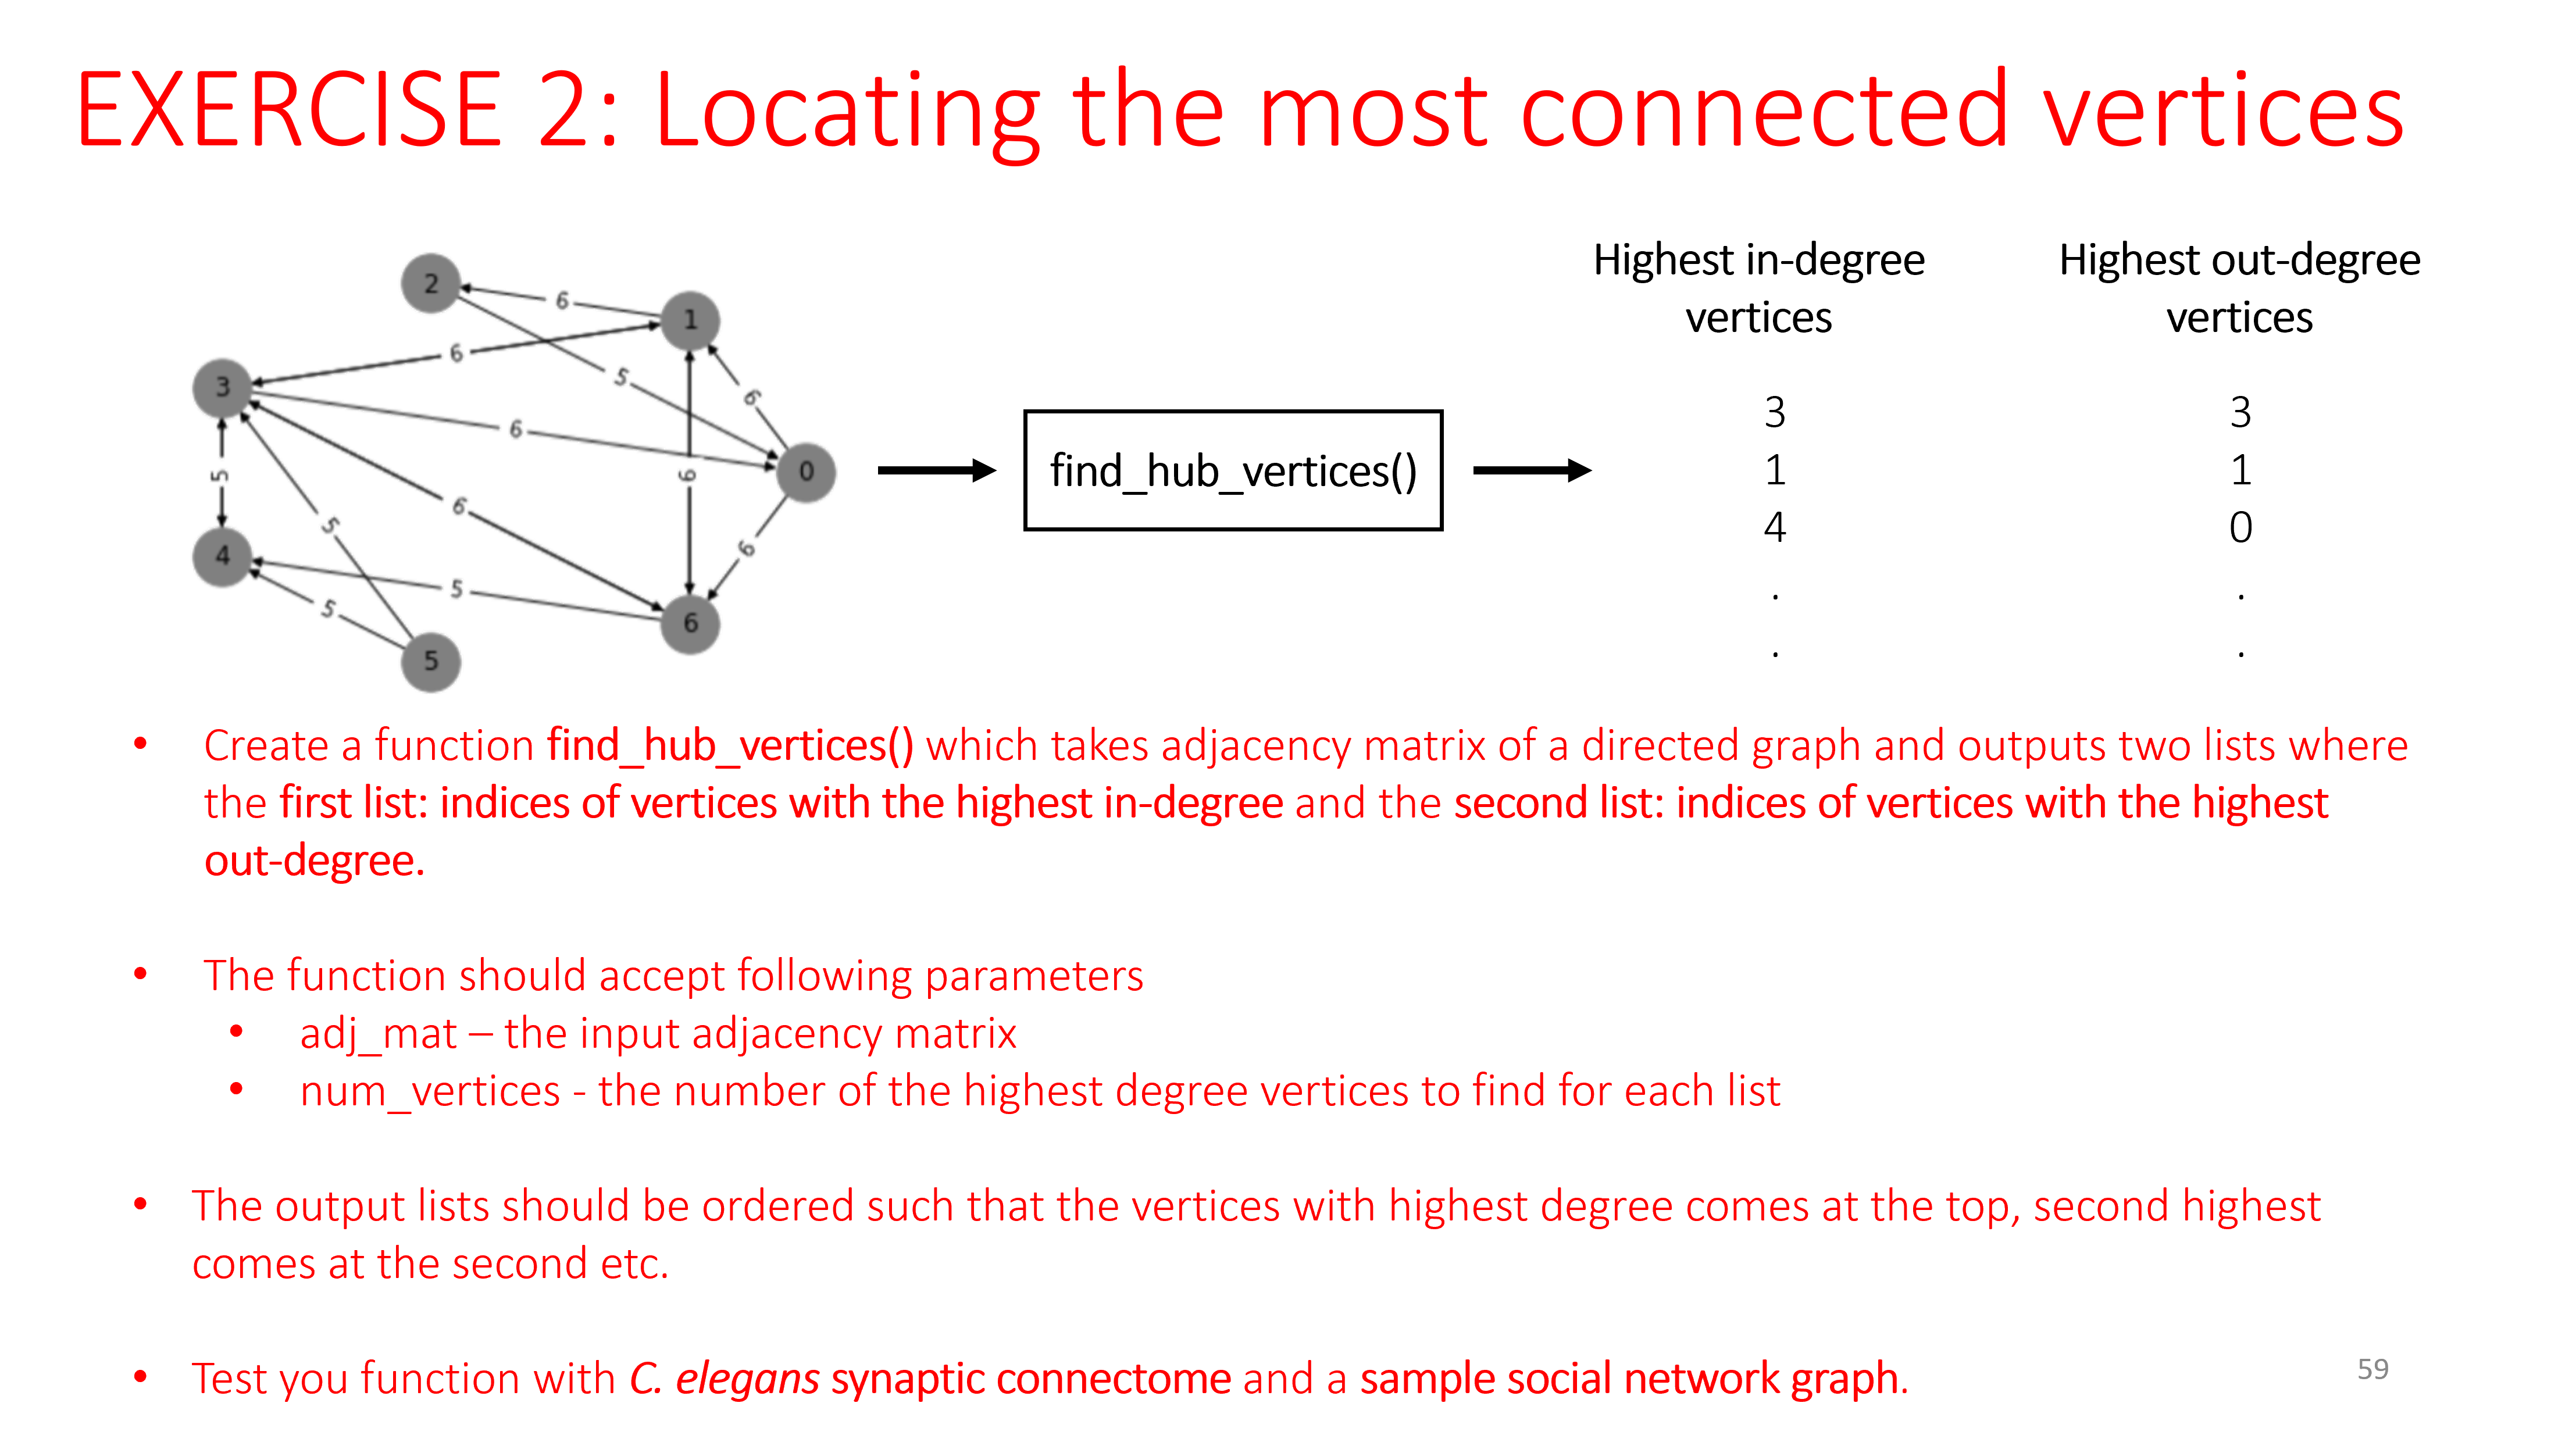

In [ ]:
ipyimage('lab5_exercise2.PNG', width = 1000)

In [ ]:
# Load the synaptic connectome and sample social network

syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
syn_conn_np = np.array(syn_conn_pd)

social_network_sample_pd = pd.read_excel('social_network_sample.xlsx')
social_network_sample_np = np.array(social_network_sample_pd)

In [ ]:
#Finds the vertices with the highest incoming and outgoing branches.
# param adj_mat - the matrix whose vertices are examined.
# param num_vertices - the number of vertices for each list.
# returns - two lists, one with the list of the vertices with the greatest in degrees, another with the list of the vertices with the greatest out degrees
def find_hub_vertices(adj_mat, num_vertices):
    indegree_list = [] #Creates empty lists for later.
    outdegree_list = []
    in_list = np.sum(adj_mat, axis = 0) #Gets all the in-degrees in the matrix.
    out_list = np.sum(adj_mat, axis = 1) #Gets all the out-degrees in the matrix.
    for num in range(num_vertices): 
        max_ind = np.argmax(in_list) #Gets the index of the max degree in the list.
        indegree_list.append(max_ind) #Adds that index to the list of maxes.
        in_list[max_ind] = 0 #Sets the max index to zero.
        max_ind = np.argmax(out_list)
        outdegree_list.append(max_ind)
        out_list[max_ind] = 0
    return indegree_list, outdegree_list

In [ ]:
# Test your function with synaptic connectome

indegree_list_syn_conn, outdegree_list_syn_conn = find_hub_vertices(adj_mat = syn_conn_np, num_vertices = 10)

In [ ]:
print(indegree_list_syn_conn)

In [ ]:
print(outdegree_list_syn_conn)

In [ ]:
# Test your function with sample social media network

indegree_list_SN, outdegree_list_SN = find_hub_vertices(adj_mat = social_network_sample_np, num_vertices = 5)

In [ ]:
print(indegree_list_SN)

In [ ]:
print(outdegree_list_SN)

## Exercise 3: Removing vertices from a graph

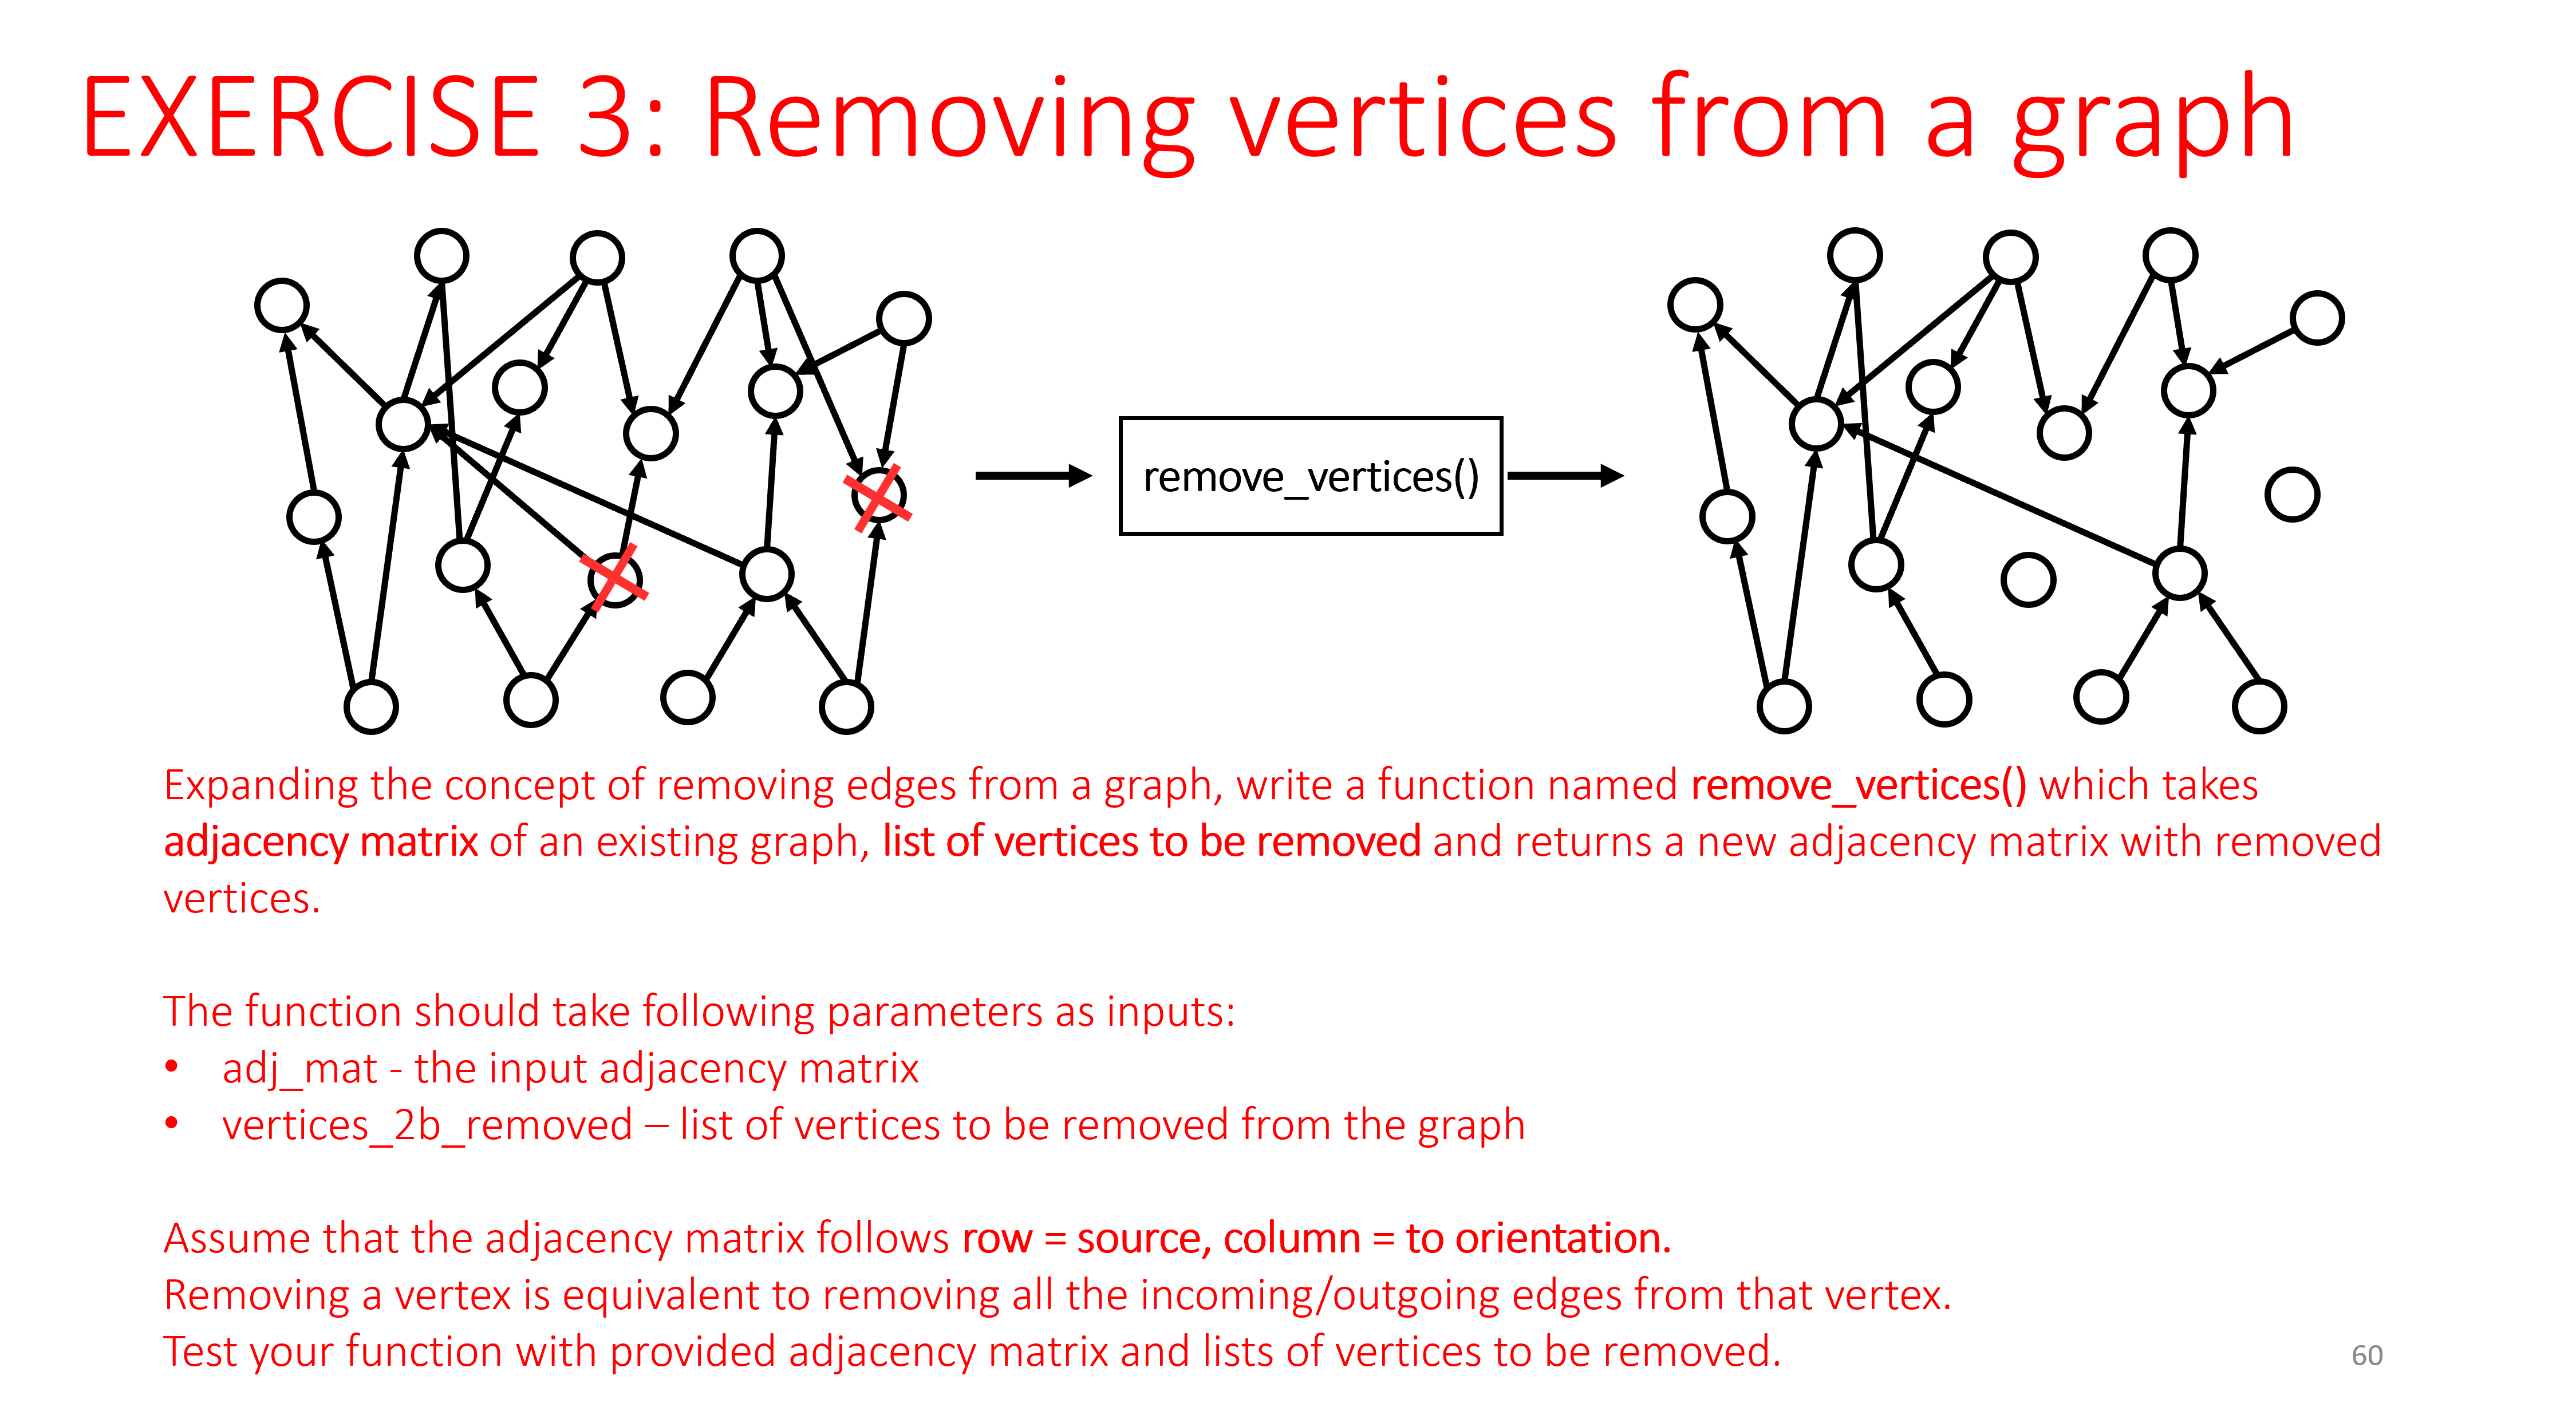

In [ ]:
ipyimage('lab5_exercise3.PNG', width = 1000)

In [ ]:
# We will use the pre-existing directed graph sample earlier in the lab

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [ ]:
#Removes given list of vertices from array.
# param adj_mat - the 2d numpy array representing the adj matrix.
# param vertices_2b_removed - the list of vertices that are to be removed.
# returns - new adj matrix without the given vertices.
def remove_vertices(adj_mat, vertices_2b_removed):    
    adj_mat_new = np.array(adj_mat) #Creates new array so that the original is not modified.
    for vertice in vertices_2b_removed: #Edits incoming/outgoing vertice values by editing the given row/column of each vertice in list.
        adj_mat_new[vertice] = 0
        adj_mat_new[:, vertice] = 0   
    return adj_mat_new

In [ ]:
vertices_2b_removed_1 = [0, 5]        # Vertices to be removed set 1
vertices_2b_removed_2 = [1, 2, 6]     # Vertices to be removed set 2

In [ ]:
# Test your function with set 1

directed_adj_mat_new_1 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_1)

In [ ]:
# Test your function with set 2

directed_adj_mat_new_2 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_2)

### Original graph image for reference

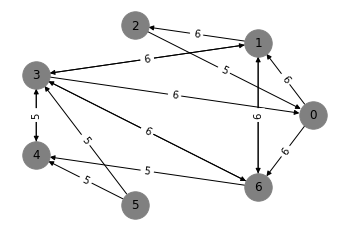

In [ ]:
ipyimage('directed_sample_graph.PNG', width = 400)

In [ ]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_1
# Use circular graph layout
# Label your edges according to their weights

adj_mat_nx = nx.from_numpy_array(directed_adj_mat_new_1, create_using=nx.DiGraph()) #Creates an NX version of the adj matrix.
pos = nx.circular_layout(adj_mat_nx) #Gets the circular layout for the picture later.
nx.draw_networkx(adj_mat_nx, pos, with_labels=True, node_size=750, node_color='grey') #Draws the network.
labels= nx.get_edge_attributes(adj_mat_nx, 'weight') #Attaches weight labels.
nx.draw_networkx_edge_labels(adj_mat_nx, pos, edge_labels=labels) #Draws edge labels.
plt.axis('off') #Turns off the axis.
plt.show() #Displays network.

In [ ]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_2
# Use circular graph layout
# Label your edges according to their weights

adj_mat_nx = nx.from_numpy_array(directed_adj_mat_new_2, create_using=nx.DiGraph()) #Creates an NX version of the adj matrix.
pos = nx.circular_layout(adj_mat_nx) #Gets the circular layout for the picture later.
nx.draw_networkx(adj_mat_nx, pos, with_labels=True, node_size=750, node_color='grey') #Draws the network.
labels= nx.get_edge_attributes(adj_mat_nx, 'weight') #Attaches weight labels.
nx.draw_networkx_edge_labels(adj_mat_nx, pos, edge_labels=labels) #Draws edge labels.
plt.axis('off') #Turns off the axis.
plt.show() #Displays network.

## Exercise 4: Adding a new vertex to a graph

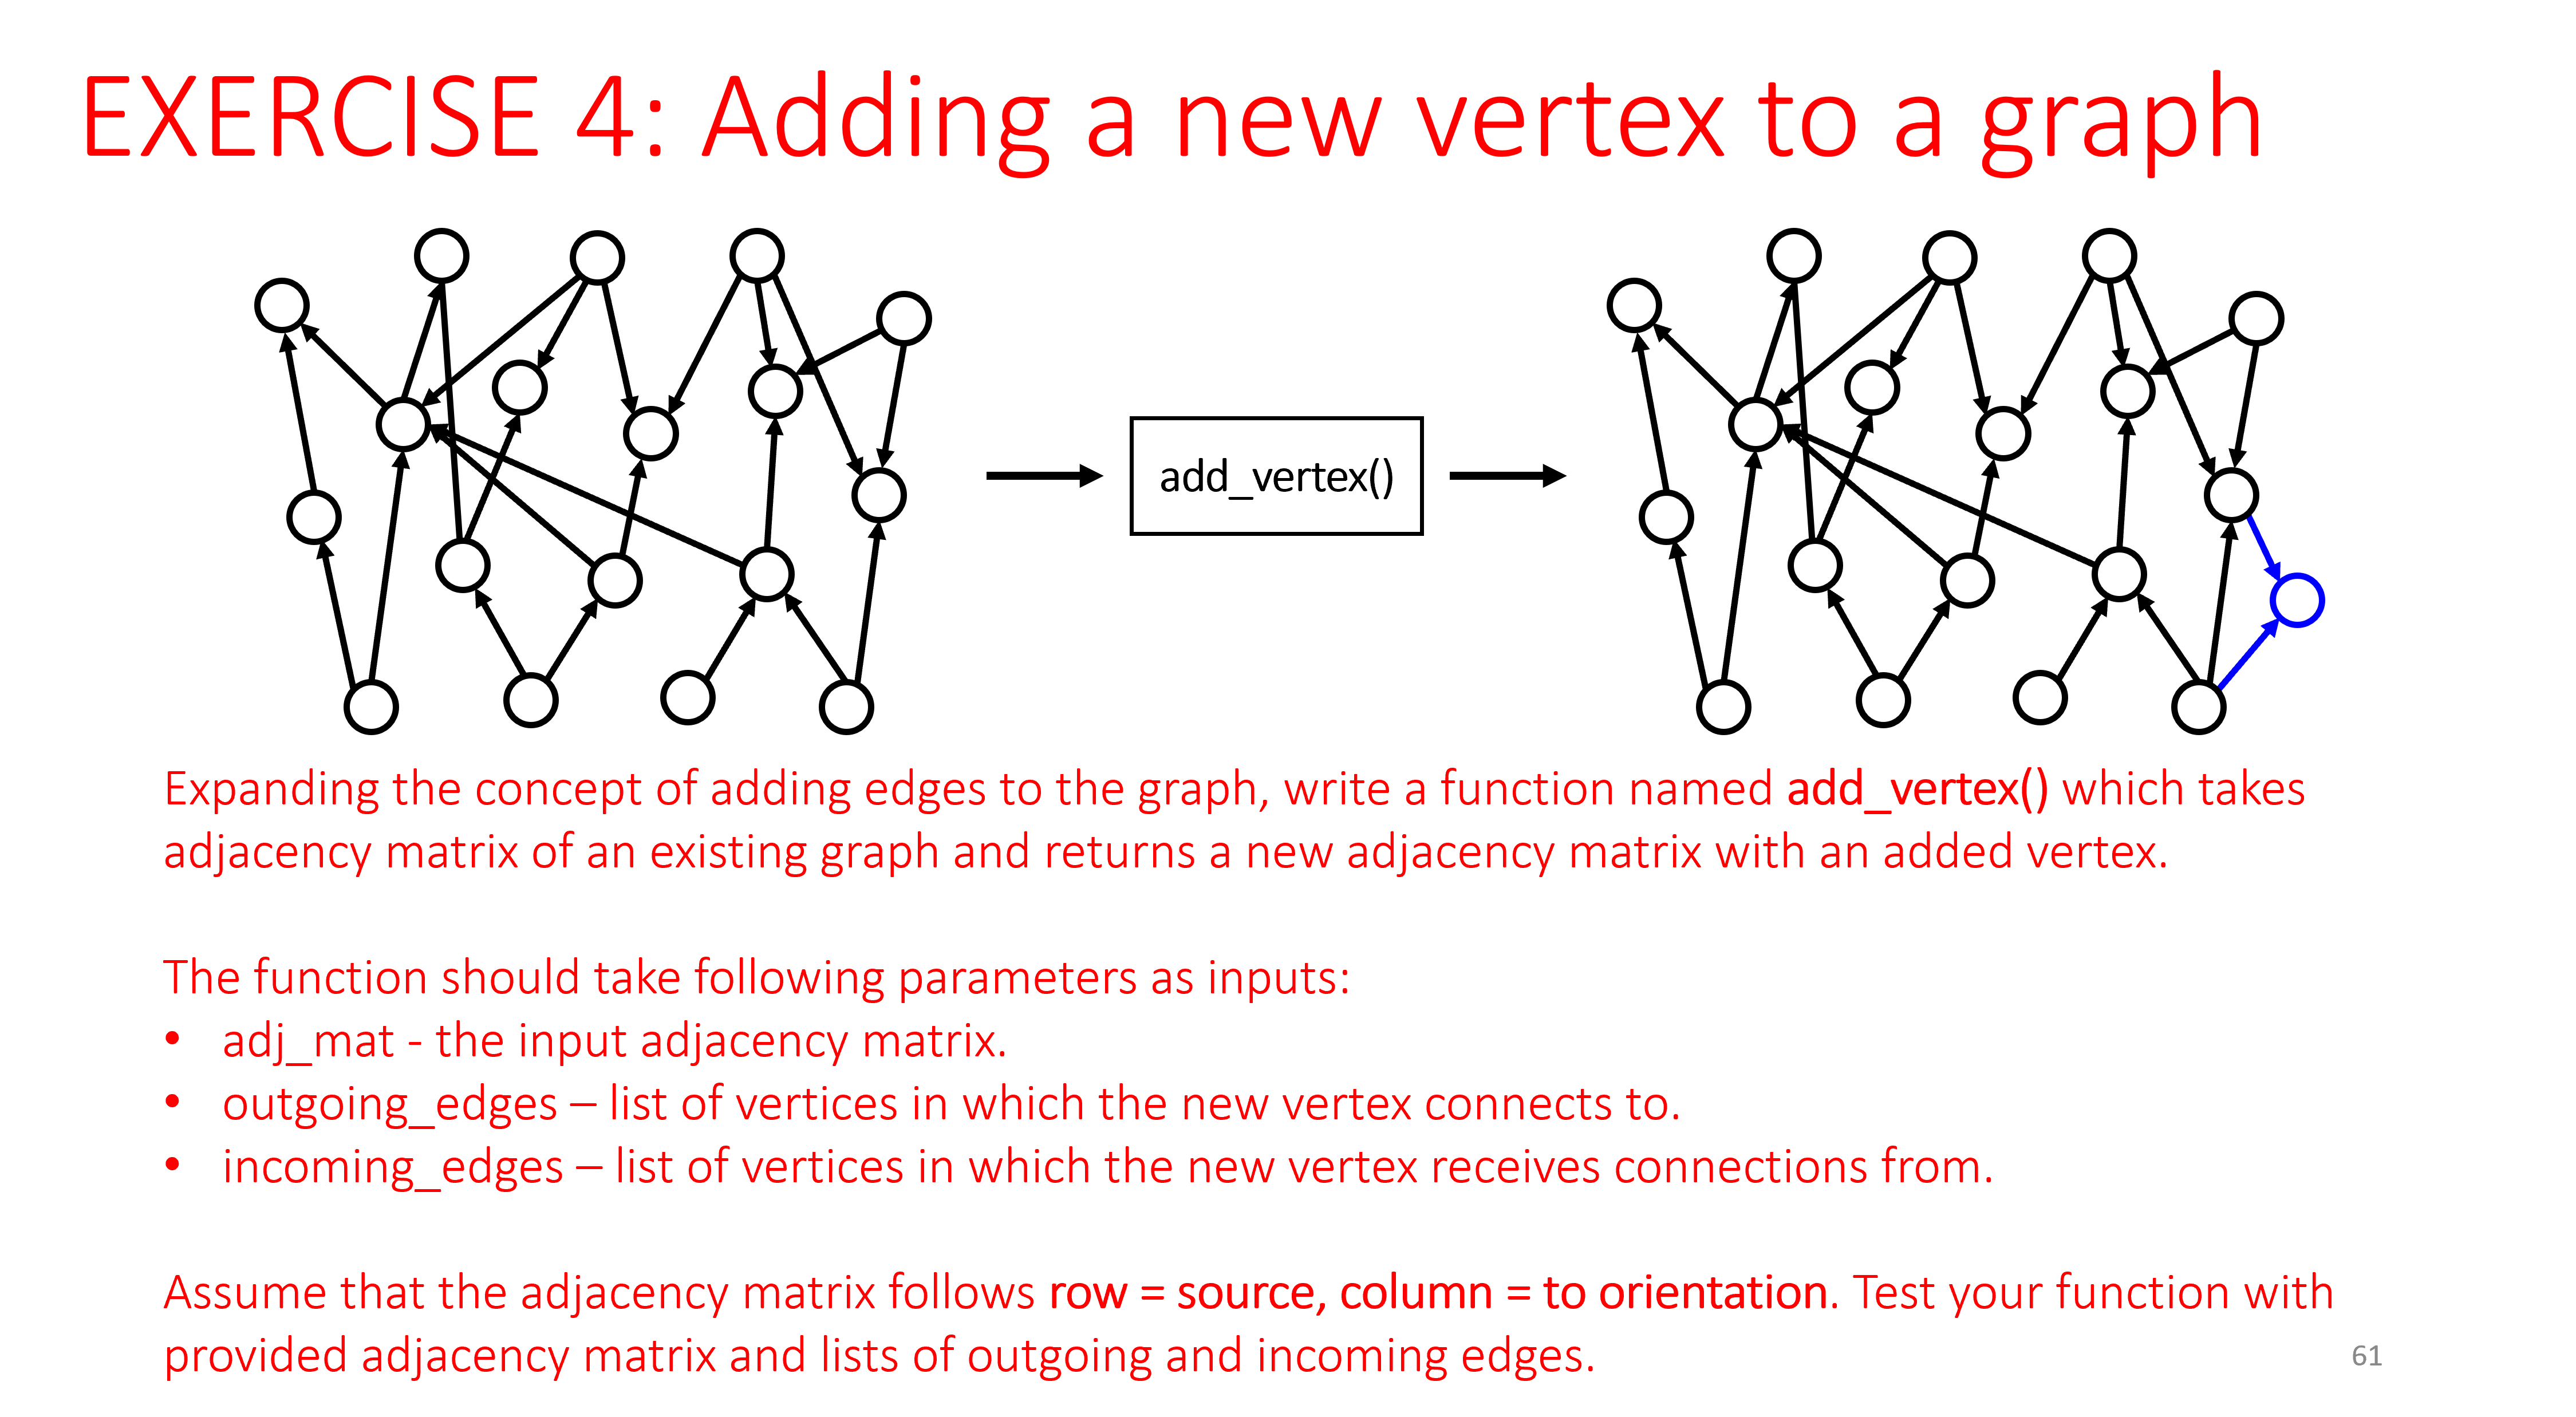

In [ ]:
ipyimage('lab5_exercise4.PNG', width = 1000)

In [ ]:
# We will use the pre-existing directed graph sample earlier in the lab
# The graph has 7 vertices

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [ ]:
#Adds a vertex to a adjacency matrix using given outgoing and incoming edges.
# param adj_mat - the 2d adjancency matrix array
# param outgoing_edges - the outgoing edges of the new vertex
# param incoming_edges - the incoming edges of the new vertex
# returns - adj matrix with added vertex
def add_vertex(adj_mat, outgoing_edges, incoming_edges):
    adj_mat_new = np.array(adj_mat) #Creates a new array of the adjacency matrix.
    newrow = np.zeros(7) #Creating blank column and row to add to matrix for the new vertex.
    newcolumn = np.zeros((8,1))
    adj_mat_new= np.vstack([adj_mat_new, newrow]) #Adds blank row and column.
    adj_mat_new = np.hstack([adj_mat_new, newcolumn])
    adj_mat_new = adj_mat_new.astype(int) #Changes matrix back to int.
    for i in outgoing_edges: #For loops: adds incoming/outgoing vertex values.
        adj_mat_new[i, 7] = 1
    for i in incoming_edges:
        adj_mat_new[7, i] = 1
    return adj_mat_new

In [ ]:
# Define outgoing and incoming edges for the new vertex to be added

outgoing_edges = [2, 3, 5]
incoming_edges = [3, 4, 6]

In [ ]:
# Test your function with provided list of outgoing/incoming edges

directed_adj_mat_vertex_added = add_vertex(adj_mat = directed_adj_mat_np, 
                                  outgoing_edges = outgoing_edges, 
                                  incoming_edges = incoming_edges)

### Original graph image for reference

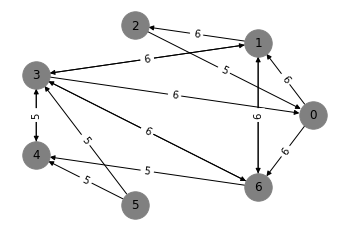

In [ ]:
ipyimage('directed_sample_graph.PNG', width = 400)

In [ ]:
# Using networkX, plot your directed graph with added vertices according to outgoing_edges and incoming_edges
# Use circular graph layout
# Label your edges according to their weights
adj_mat_nx = nx.from_numpy_array(directed_adj_mat_vertex_added, create_using=nx.DiGraph()) #Creates an NX version of the adj matrix.
pos = nx.circular_layout(adj_mat_nx) #Gets the circular layout for the picture later.
nx.draw_networkx(adj_mat_nx, pos, with_labels=True, node_size=750, node_color='grey') #Draws the network.
labels= nx.get_edge_attributes(adj_mat_nx, 'weight') #Attaches weight labels.
nx.draw_networkx_edge_labels(adj_mat_nx, pos, edge_labels=labels) #Draws edge labels.
plt.axis('off') #Turns off the axis.
plt.show() #Displays network.

## Exercise 5: Re-wire neurons to restore behavior of C. elegans

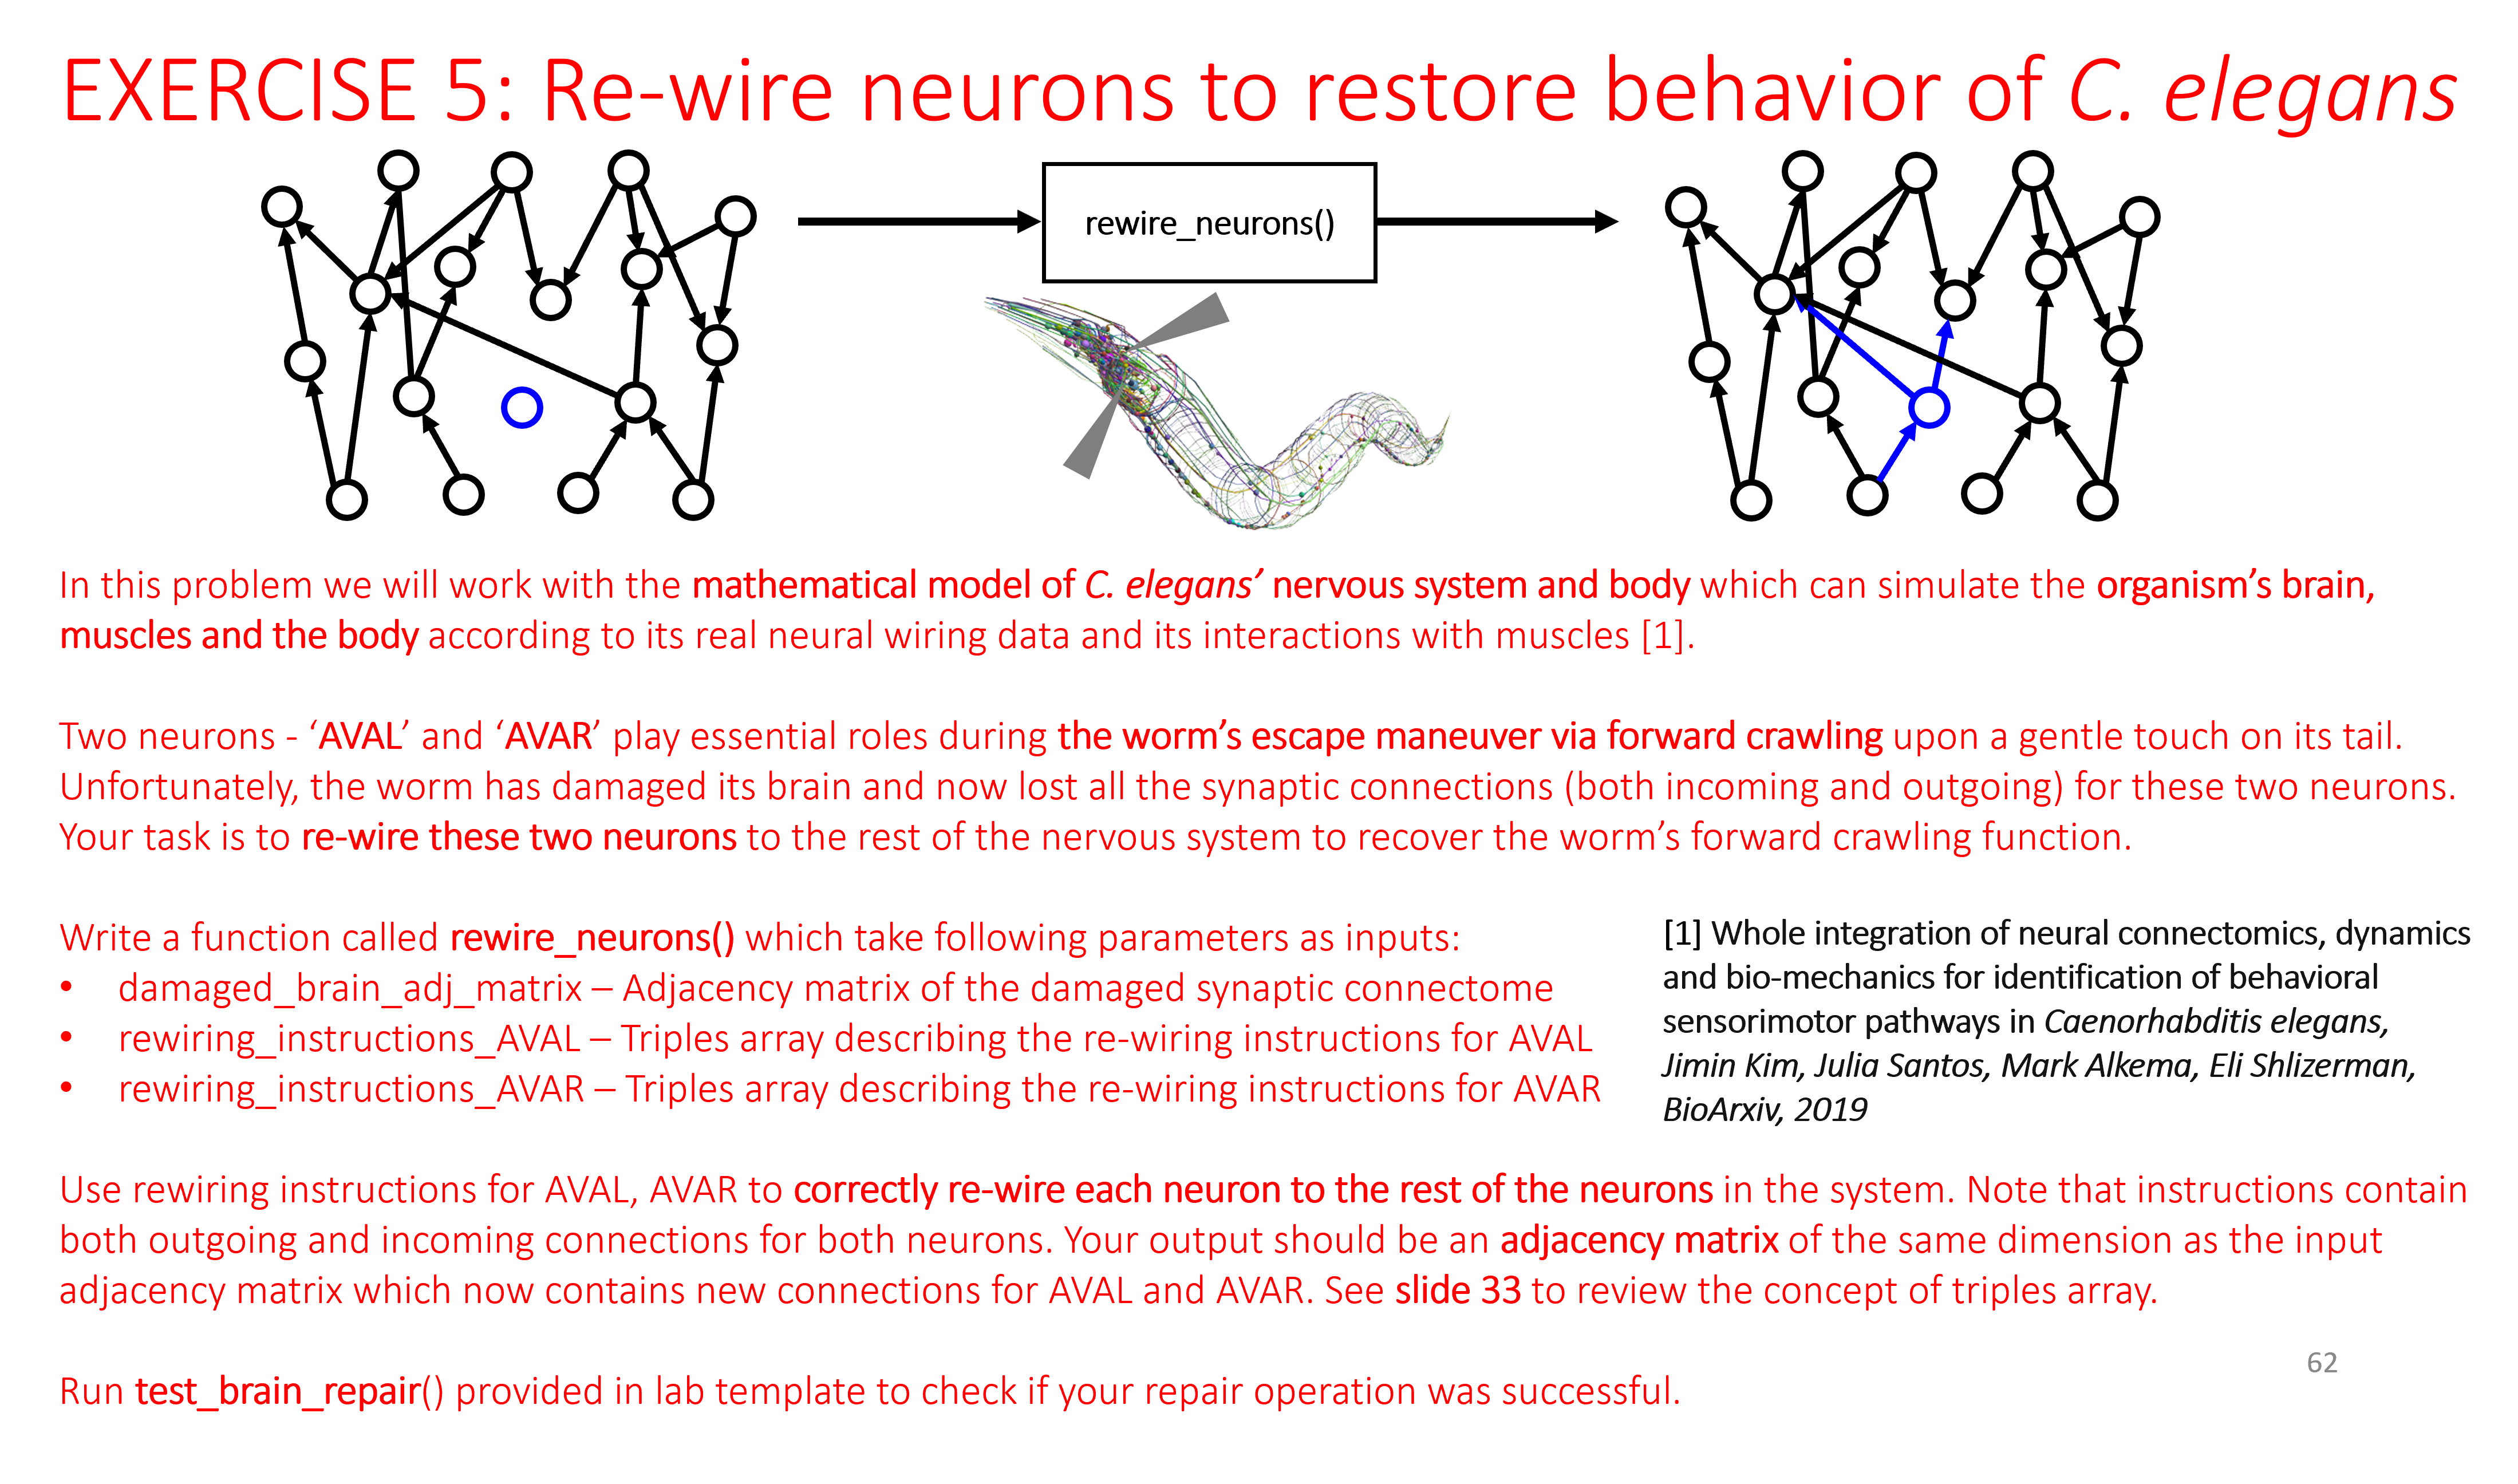

In [ ]:
ipyimage('lab5_exercise5.PNG', width = 1000)

### Note: If you wish to use the included C. elegans simulation code in lab template folder outside of EE 241 (e.g. research purpose), please cite the following paper 
### Kim, J., Leahy, W., & Shlizerman, E. (2019). Neural interactome: Interactive simulation of a neuronal system. Frontiers in Computational Neuroscience, 13, 8. 

In [ ]:
# Load synaptic connectome and neuron classes

damaged_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
damaged_syn_conn_np = np.array(damaged_syn_conn_pd)

## Motorneurons' activities during gentle tail touch (Damaged brain)

In [ ]:
ipyimage('damaged_AVA_motor_activities.PNG', width = 450)

## Simulated body movement during gentle tail touch (Damaged brain)

In [ ]:
from ipywidgets import Video

Video.from_file("escape_response_damaged.mp4", width=500, height=500)

In [ ]:
# Re-wiring instructions for AVAL and AVAR neurons

outgoing_AVAL_triples = np.load('AVAL_outgoing_triples.npy') # AVAL is the 47th vertex in the graph
incoming_AVAL_triples = np.load('AVAL_incoming_triples.npy') # AVAL is the 47th vertex in the graph

outgoing_AVAR_triples = np.load('AVAR_outgoing_triples.npy') # AVAR is the 55th vertex in the graph
incoming_AVAR_triples = np.load('AVAR_incoming_triples.npy') # AVAR is the 55th vertex in the graph

# Each row in the triple is ordered as [Source neuron index, Target neuron index, Synaptic weight]

rewiring_triples_AVAL = [outgoing_AVAL_triples, incoming_AVAL_triples]
rewiring_triples_AVAR = [outgoing_AVAR_triples, incoming_AVAR_triples]

In [ ]:
#Rewires the damaged neurons in the nervous system according to given instructions.
# param damaged_synaptic_adj_matrix - the given damaged adj matrix representing the brain of the worm.
# param rewiring_instructions_AVAL - the list of rewiring instructions for the AVAL nerons.
# param rewiring_instructions_AVAR - the list of rewiring instructions for the AVAR nerons.
def rewire_neurons(damaged_synaptic_adj_matrix, rewiring_instructions_AVAL, rewiring_instructions_AVAR):
    
    repaired_synaptic_adj_matrix = np.array(damaged_synaptic_adj_matrix) #Creates new array of the adj matrix so that the original is not modified.
    out_AVAL = rewiring_instructions_AVAL[0]  #Removes instructions from lists for both AVAL and AVAR.
    in_AVAL = rewiring_instructions_AVAL[1]
    out_AVAR = rewiring_instructions_AVAR[0]
    in_AVAR = rewiring_instructions_AVAR[1]
    
    for triple in out_AVAL: #For loops: extracts the row, column, and weight of each instruction, and then modifies the adj matrix.
        row = triple[0]
        col = triple[1]
        weight = triple[2]
        repaired_synaptic_adj_matrix[row, col] = weight
    for triple in in_AVAL:
        row = triple[0]
        col = triple[1]
        weight = triple[2]
        repaired_synaptic_adj_matrix[row, col] = weight
    for triple in out_AVAR:
        row = triple[0]
        col = triple[1]
        weight = triple[2]
        repaired_synaptic_adj_matrix[row, col] = weight
    for triple in in_AVAR:
        row = triple[0]
        col = triple[1]
        weight = triple[2]
        repaired_synaptic_adj_matrix[row, col] = weight
    
    return repaired_synaptic_adj_matrix

In [ ]:
repaired_synaptic_adj_matrix = rewire_neurons(damaged_synaptic_adj_matrix = damaged_syn_conn_np, 
                                              rewiring_instructions_AVAL = rewiring_triples_AVAL, 
                                              rewiring_instructions_AVAR = rewiring_triples_AVAR)

In [ ]:
# Test your repaired connectome 

dw.network_sim.test_brain_repair(repaired_synaptic_adj_matrix) 

# If successfully repaired, function will output 
# 1) Motorneurons activity 
# 2) Simulated body movement video with repaired brain